# 다중 분류
---

In [1]:
!gdown https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv

Downloading...
From: https://raw.githubusercontent.com/devdio/datasets/main/penguins.csv
To: /content/penguins.csv
13.8kB [00:00, 12.7MB/s]       


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

In [4]:
penguins = pd.read_csv("/content/penguins.csv")
penguins.shape

(344, 7)

## 전처리

### 결측치

In [5]:
penguins.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
penguins[penguins['bill_length_mm'].isnull()]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN


In [10]:
df = penguins.drop([3, 339], axis=0)
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  9
dtype: int64

In [11]:
df['sex'].value_counts()

MALE      168
FEMALE    165
Name: sex, dtype: int64

In [13]:
df['sex'] = df['sex'].fillna('MALE')
# 남성으로 결측치 해결

### 더미변수화

In [15]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [16]:
df['species'] = df['species'].map({'Adelie':0,
                                   'Chinstrap':1,
                                   'Gentoo':2})
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,0,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,0,Torgersen,40.3,18.0,195.0,3250.0,FEMALE


In [17]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [18]:
df['island'] = df['island'].map({'Torgersen':0,
                                   'Biscoe':1,
                                   'Dream':2})
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,MALE
1,0,0,39.5,17.4,186.0,3800.0,FEMALE
2,0,0,40.3,18.0,195.0,3250.0,FEMALE


In [20]:
df['sex'] = df['sex'].map({'MALE':0,
                           'FEMALE':1})
df.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,0
1,0,0,39.5,17.4,186.0,3800.0,1
2,0,0,40.3,18.0,195.0,3250.0,1


### 데이터 분할, 정규화

In [22]:
X = df.drop(['species'], axis=1)
y = df['species']

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 2022)
X_train.shape, X_test.shape

((273, 6), (69, 6))

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

## 학습

In [32]:
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,0,39.1,18.7,181.0,3750.0,0
1,0,0,39.5,17.4,186.0,3800.0,1
2,0,0,40.3,18.0,195.0,3250.0,1
4,0,0,36.7,19.3,193.0,3450.0,1
5,0,0,39.3,20.6,190.0,3650.0,0


In [47]:
from tensorflow.keras.utils import to_categorical

y_train_o = to_categorical(y_train)
y_test_o = to_categorical(y_test)

In [48]:
model = keras.Sequential(
    [layers.Dense(units=64, activation='relu', input_shape=(6,)),
    layers.Dense(units=32, activation='relu'),
    layers.Dense(units=3, activation='softmax')]
)

model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['acc']
)

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                448       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 2,627
Trainable params: 2,627
Non-trainable params: 0
_________________________________________________________________


In [ ]:
EPOCHS = 300
BATCH_SIZE = 32

history = model.fit(X_train_s, y_train_o, 
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_split=0.2,
          verbose=1)

In [51]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

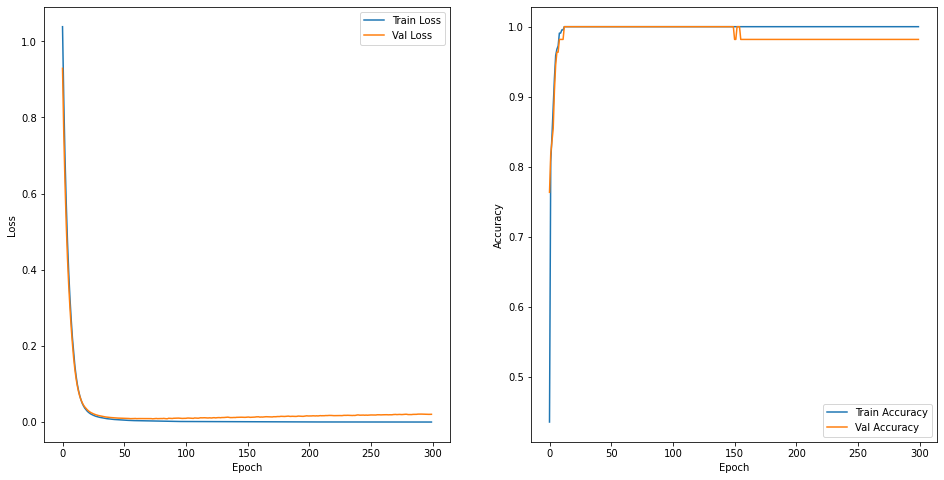

In [52]:
plot_history(history)

In [53]:
# epoch 50 이전이 가장 좋은 성능

## 평가

In [54]:
model.evaluate(X_train_s, y_trian_o)

9/9 [==============================] - 0s 3ms/step - loss: 0.0042 - acc: 0.9963


[0.0042333947494626045, 0.9963369965553284]

In [55]:
model.evaluate(X_test_s, y_test_o)

3/3 [==============================] - 0s 5ms/step - loss: 0.0068 - acc: 1.0000


[0.00676463358104229, 1.0]

In [57]:
y_pred = model.predict(X_test_s)
y_pred[:5]

3/3 [==============================] - 0s 4ms/step


array([[9.9999923e-01, 7.4783451e-08, 5.3989652e-07],
       [9.9999994e-01, 1.4443898e-08, 5.7599266e-08],
       [9.9999982e-01, 1.9994699e-08, 8.8143892e-08],
       [4.4417975e-05, 4.2811451e-05, 9.9991268e-01],
       [1.9930367e-06, 8.8494007e-06, 9.9998909e-01]], dtype=float32)

In [65]:
y_pred_o = y_pred.argmax(axis=1)
y_pred_o

array([0, 0, 0, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 0, 2, 0, 2, 0, 2, 1, 2, 2, 2, 0,
       1, 2, 2])

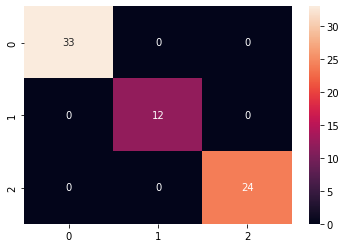

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion = confusion_matrix(y_test, y_pred_o)
sns.heatmap(confusion, annot=True)